

# <center><h1>Data Pre-processing </center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section2)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing and Importing Libraries**](#Section3)<br>

**4.** [**Loading data using Pandas**](#Section4)<br>

**5.** [**Data Preprocessing**](#Section5)<br>
  - **5.1** [**Reading Image**](#section401)<br>
  - **5.2** [**Crop Image**](#section401)<br>
  - **5.3** [**Resizing Image**](#section401)<br>
  - **5.4** [**Greyscaling**](#section401)<br>
  - **5.5** [**Apply Blur Filter**](#section401)<br>
  - **5.6** [**Data Augmentation**](#section401)<br>

---
<a name = Section2></a>
# **1. Introduction**
---

- A few problems **associated** with image data include **complexity**, **inaccuracy**, and **inadequacy**. 

- This is why before **building** a **computer vision** model, it is essential that the data is **preprocessed** (cleaned and processed to the desired format) to achieve the **desired results**.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Image preprocessing is the core part of computer vision which plays a crucial role in many **real-world** examples like **robotics**, **self-driving cars**, and **object detection**. 

- Image processing allows us to **transform** and **manipulate** thousands of images at a **time** and **extract** useful insights from them.


<br>  
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/e2e/ee/dp8.gif"width="650" height="320"/></center>

<br>  


- **Masks** play a crucial role in **protecting** the **health** of individuals against **respiratory** diseases, as is one of the few **precautions** available for **COVID-19** in the absence of **immunization**.

- The dataset is **containing** images of the **different** people **with and without** masks.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---


### **Importing Libraries**

In [ ]:
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
from PIL import Image
import os,sys
import keras  
import glob 
from skimage import io 
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array #Keras dataset generator class.
import cv2

---
<a name = Section4></a>
# **4. Loading data from Google Cloud Storage**
---

In [ ]:
!gsutil cp -r gs://insaid_e2e/Face_Mask_Data.zip  /content/mask_data

Copying gs://insaid_e2e/Face_Mask_Data.zip...
- [1 files][  7.9 MiB/  7.9 MiB]                                                
Operation completed over 1 objects/7.9 MiB.                                      


- **Unzip Dataset**

In [ ]:
!unzip /content/mask_data

Archive:  /content/mask_data
replace Data/Non Mask/112.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/Non Mask/112.jpg   
  inflating: Data/Non Mask/123.jpg   
  inflating: Data/Mask/0121.png      
  inflating: Data/Non Mask/0.jpg     
  inflating: Data/Non Mask/106.jpg   
  inflating: Data/Non Mask/127.jpg   
  inflating: Data/Mask/0170.jpg      
  inflating: Data/Non Mask/140.jpg   
  inflating: Data/Non Mask/105.jpg   
  inflating: Data/Non Mask/102.jpg   
  inflating: Data/Non Mask/109.jpg   
  inflating: Data/Non Mask/122.jpg   
  inflating: Data/Non Mask/101.jpg   
  inflating: Data/Non Mask/152.jpg   
  inflating: Data/Non Mask/120.jpg   
  inflating: Data/Non Mask/108.jpg   
  inflating: Data/Mask/0048.jpg      
  inflating: Data/Non Mask/111.jpg   
  inflating: Data/Non Mask/114.jpg   
  inflating: Data/Non Mask/128.jpg   
  inflating: Data/Mask/0153.jpg      
  inflating: Data/Mask/0115.jpg      
  inflating: Data/Mask/0201.jpg      
  inflating: Data/Mask/016

---
<a name = Section5></a>
# **5. Data Preprocessing**
---

- Since images exist in **different** formats, i.e., natural, fake, grayscale, etc., we need to take into **consideration** and **standardize** them before **feeding** them into a **neural network**.

- **Processing** can be used to **improve** the **quality** of your image, or to help you **extract** useful **information** from it. 

- It’s useful in fields like **medical imaging**, and it can even be used to **hide data** inside an image.

<a name = Section401></a>
### **5.1 Reading Image**

  

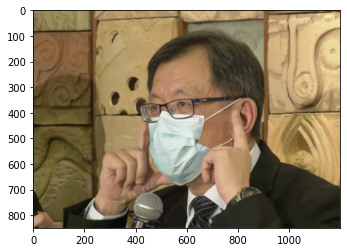

In [ ]:
image = Image.open('Data/Mask/0170.jpg')    # Provide Path of Image
plt.imshow(image)
plt.show()

In [ ]:
dataset_path = '/content/Data'
label = ['Mask','Non Mask']

In [ ]:
img_path=[]
for i in label:
  # glob through the directory (returns a list of all file paths)
  list_image = os.path.join(dataset_path, i, '*')
  img_path.extend(glob.glob(list_image))#  access some element (a file) from the list

In [ ]:
img_path

['/content/Data/Mask/0197.png',
 '/content/Data/Mask/0129.png',
 '/content/Data/Mask/0055.jpg',
 '/content/Data/Mask/0018.jpg',
 '/content/Data/Mask/0170.jpg',
 '/content/Data/Mask/0037.jpg',
 '/content/Data/Mask/0171.jpg',
 '/content/Data/Mask/0048.jpg',
 '/content/Data/Mask/0126.jpg',
 '/content/Data/Mask/0022.jpg',
 '/content/Data/Mask/0190.jpg',
 '/content/Data/Mask/0097.png',
 '/content/Data/Mask/0188.jpg',
 '/content/Data/Mask/0198.jpg',
 '/content/Data/Mask/0150.jpg',
 '/content/Data/Mask/0200.jpg',
 '/content/Data/Mask/0121.png',
 '/content/Data/Mask/0116.png',
 '/content/Data/Mask/0201.jpg',
 '/content/Data/Mask/0153.jpg',
 '/content/Data/Mask/0027.jpg',
 '/content/Data/Mask/0115.jpg',
 '/content/Data/Mask/0158.jpg',
 '/content/Data/Mask/0160.jpg',
 '/content/Data/Mask/0019.jpg',
 '/content/Data/Mask/0063.jpg',
 '/content/Data/Mask/0128.png',
 '/content/Data/Mask/0043.jpg',
 '/content/Data/Mask/0066.jpg',
 '/content/Data/Non Mask/114.jpg',
 '/content/Data/Non Mask/104.jpg',
 '

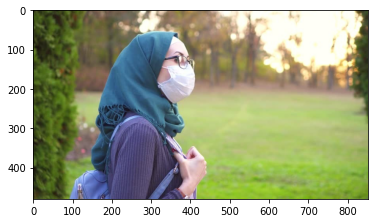

In [ ]:
image = io.imread(img_path[21])  # Read a random Image
plt.imshow(image)                
plt.show()

In [ ]:
image.shape    # Shape of the image

(480, 852, 3)

**Observation:**

- Display image with **size (428, 320, 3)**.

<a name = Section401></a>
### **5.2 Crop Image**

- **Cropping** is done to **remove** all unwanted **objects or areas** from an image or to **highlight** a particular **feature** of an image. 
 

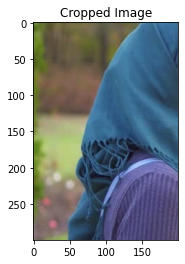

(300, 200, 3)

In [ ]:
cropped_image = image[80:380, 100:300]            # Crop image using Slicing 

plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
cv2.imwrite("Cropped Image.jpg", cropped_image)   # Store Image 
cropped_image.shape

**Observation:**

- We can see **cropped** image with shape (300, 200, 3).

<a name = Section401></a>
### **5.3 Image Resizing**

- Images **captured** from various **resources** generally **vary** in size, therefore, to fed them in our **AI algorithm** we should **establish** a base **size** for all images. 

- If **network** expects an input image with **224x224 pixels**, so we need to **resize** all the images to the **mentioned dimension** before preparing them for **model** building.

  

- **Downscaling Image**

In [ ]:
print('Original Shape',image.shape)

Original Shape (480, 852, 3)


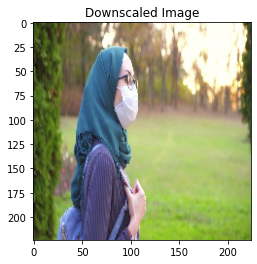

Resized Shape (224, 224, 3)


In [ ]:
width = 224
height = 224
dims = (width, height)
resized_down = cv2.resize(image, dims)      # Provide Image, Expected Dimension 
plt.imshow(resized_down)
plt.title('Downscaled Image')
plt.show()
print('Resized Shape',resized_down.shape)

**Observation:**

- We can see **downscaled** image with **size (224, 224, 3)**.

- **Upscaling Image**

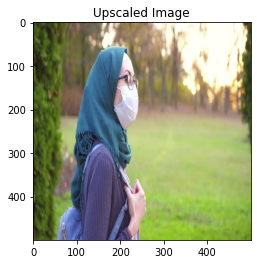

Resized Shape (500, 500, 3)


In [ ]:
width=500
height=500
dims=(width,height)
resized_up = cv2.resize(image, dims)      # Provide Image, Expected Dimension
plt.imshow(resized_up)
plt.title('Upscaled Image')
plt.show()
print('Resized Shape',resized_up.shape)

**Observation:**

- We can see **upscaled** image with **size (500, 500, 3)**.

Text(0.5, 0.98, 'Original & Resized Image')

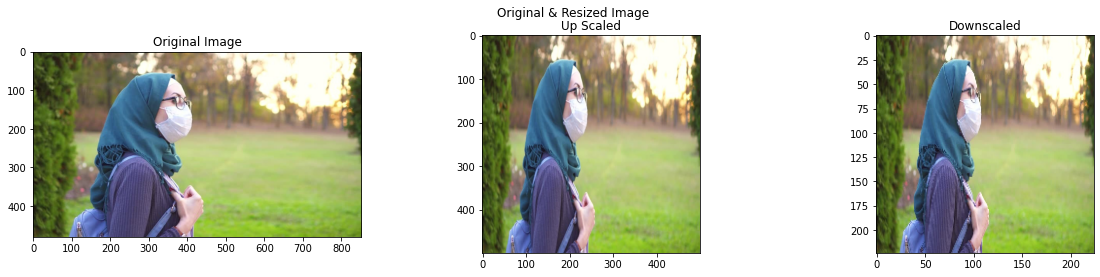

In [ ]:
img, (img1, img2, img3) = plt.subplots(1, 3)
img.set_figwidth(20) 
img1.imshow(image)  #Original image
img1.set_title("Original Image") #Original image

img2.imshow(resized_up) #Up Scaled
img2.set_title("Up Scaled")

img3.imshow(resized_down) #Downscaled
img3.set_title("Downscaled")

img.suptitle('Original & Resized Image')

<a name = Section401></a>
### **5.4 Greyscale**

- **Grayscale** is simply converting **images** from **colored** to **black and white**. It is normally used to **reduce** **computation complexity** in machine learning algorithms.

- Since most **pictures** don’t need **color** to be recognized, it is wise to use **grayscale**, which reduces the number of **pixels** in an image, thus, **reducing** the **computations** required.

Text(0.5, 1.0, 'Gray Scale Image')

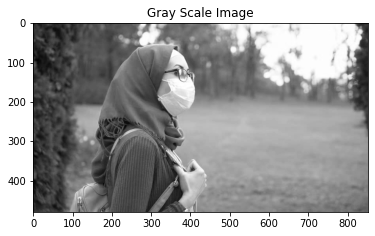

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.title('Gray Scale Image')

**Observation:**

- Image converted to **Gray Scale**.

<a name = Section401></a>
### **5.5 Blur Filter**

- Image blurring is **achieved** by convolving the image with a **low-pass filter** kernel. 

- It is useful for **removing noise**. It actually removes **high frequency** content (eg: noise, edges) from the **image**.

In [ ]:
img_blur = cv2.blur(src=image, ksize=(5,5)) # Apply Blur Filter using CV2. 

**Apply Gaussian blur**

- Gaussian filter takes the **neighbourhood** around the pixel and finds its **Gaussian weighted average**. 

In [ ]:
# sigmaX is Gaussian Kernel standard deviation 
# ksize is kernel size
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5), sigmaX=0, sigmaY=0)

**Apply Median blur**

- Here, the function **`cv.medianBlur()`** takes the **median** of all the pixels under the **kernel area** and the **central element** is replaced with this **median** value. 

In [ ]:
# medianBlur() is used to apply Median blur to image
# ksize is the kernel size
median = cv2.medianBlur(src=image, ksize=5)

**Apply Bilateral Filtering**

- **cv.bilateralFilter()** is highly **effective** in noise removal while keeping edges sharp. But the operation is **slower** compared to other filters. 

In [ ]:
# Using the function bilateralFilter() where d is diameter of each...
# ...pixel neighborhood that is used during filtering.
# sigmaColor is used to filter sigma in the color space.
# sigmaSpace is used to filter sigma in the coordinate space.
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

**Apply sharpening using kernel**

- **Sharpening** is a technique for **increasing** the apparent **sharpness** of an image. 


In [ ]:
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)

Text(0.5, 1.0, 'Biletral Filter')

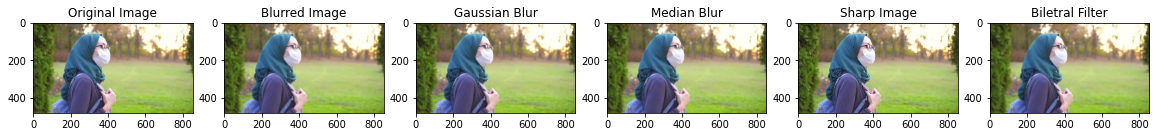

In [ ]:
img, (img1, img2, img3,img4,img5,img6) = plt.subplots(1, 6)
img.set_figwidth(20) 
img1.imshow(image) 
img1.set_title("Original Image") #Original image


img2.imshow(img_blur) # Blurred Image
img2.set_title("Blurred Image") 


img3.imshow(gaussian_blur) #Gaussian Blur
img3.set_title("Gaussian Blur") 


img4.imshow(median)  #Median Blur
img4.set_title("Median Blur") 

img5.imshow(sharp_img) #Sharp Image
img5.set_title("Sharp Image") 

img6.imshow(bilateral_filter) #Biletral Filter
img6.set_title("Biletral Filter") 

**Observation:**

- We can see differences between images after applying various filters. 

<a name = Section401></a>
### **5.6 Data Augmentation**

- It is the technique of introducing **diversity** in the training data, without **collecting** any actual new data, by **performing** simple **operations**.
    
- The most common use case of data augmentation is **image augmentation**.
   
- We can create many **new images** from a single image using **various** **techniques** such as **rotation, flipping, shifting/translation, brightness adjustment, scaling, sharpening, etc**.

- **Data augmentation** is useful to improve **performance** and outcomes of machine learning models by **forming** new and different **examples** to train datasets. 

- If dataset in a **AI model** is rich and **sufficient**, the model performs better and **more accurate**.



#### **How does it work?**

- **Computer vision** applications use common **data augmentation** methods for training data. 

<br>  
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/e2e/ee/dp5.png"width="740" height="270"/></center>

<br>  

#### **Random Rotation**

- This transformation **rotates** an image in a **clockwise** direction by an angle between **0 to 360**. 

- It also can cause **some pixels** to be **clipped** out and **create** a new region that has to be **filled**.

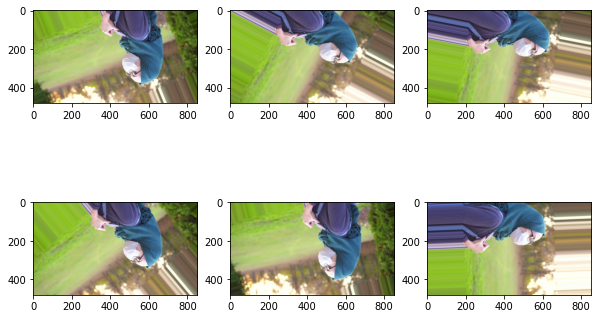

In [ ]:
#Rotation
data = img_to_array(image)
samples = expand_dims(data, axis=0)
data_generated = ImageDataGenerator(rotation_range=180)  #Here we specify angle of rotation as 90
it = data_generated.flow(samples, batch_size=1)

f = plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** having rotation angle between **0 to 180 Degree** w.r.t. **original** image. 

#### **Height Shift**

**Vertical Shift Augmentation**

- All the pixels of the image are **shifted** **vertically** while keeping the image **dimensions** same. 

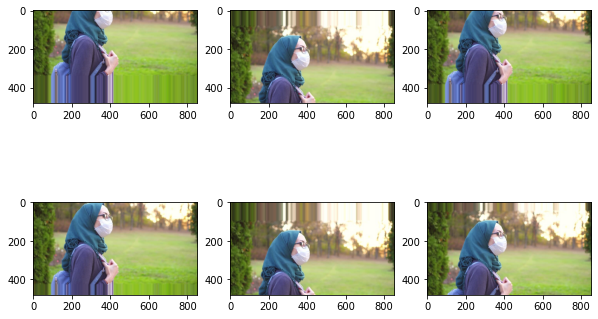

In [ ]:
data_generator = ImageDataGenerator(height_shift_range=0.5)    # Specify Height_Shift parameter
it = data_generator.flow(samples, batch_size=1)
f = plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** shifted **vertically** with range between **0 to 0.5**

**Horizontal Shift Augmentation**

- All the **pixels** of the image are shifted **horizontally** while keeping the **image dimensions** same. This causes some **pixels** to be **clipped** **off** the image. 

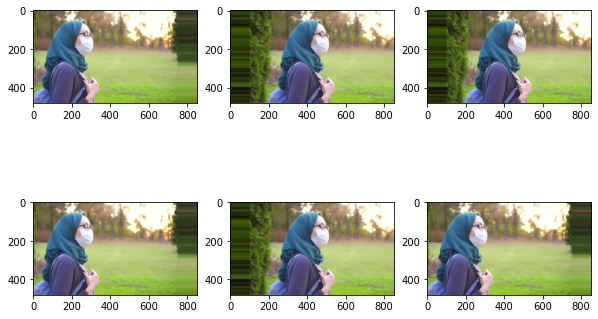

In [ ]:
data_generator = ImageDataGenerator(width_shift_range=[-100,100])   # Pixel Shift range between [-100,100]
it = data_generator.flow(samples, batch_size=1)
f = plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** shifted **horizontally** with range between **0 to 0.5**

#### **Brightness**

- The brightness of the image can be **augmented** by either randomly **darkening** images, **brightening** images, or both. 

- The intent is to allow a model to **generalize** across images **trained** on different **lighting** levels.


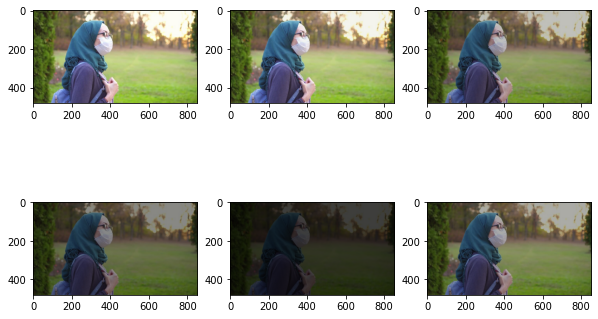

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
f = plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** in various **brightness** condition. 

#### **Random Zoom**

- A zoom **augmentation** randomly zooms the image in and either adds **new pixel** values around the image or **interpolates** pixel values.

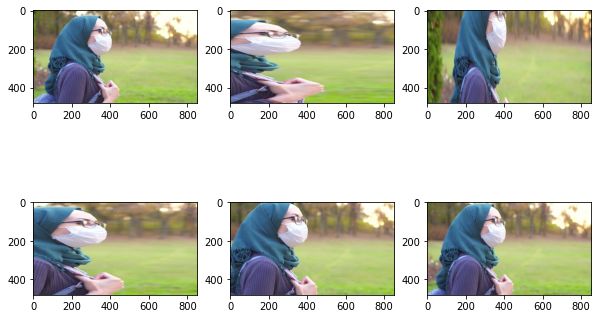

In [ ]:
datagen = ImageDataGenerator(zoom_range=[0.2,1.0])  # specifying zoom range 
it = datagen.flow(samples, batch_size=1)
f = plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** after applying **random zooming** in range of **0.2 to 1**. 

#### **Image Flipping**

- An image flip means **reversing** the **rows or columns** of pixels in the case of a **vertical** or **horizontal** flip respectively. 

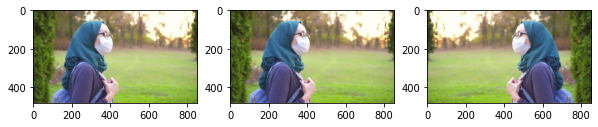

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
f = plt.figure(figsize=(10,10))

for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

**Observation:** 

- We can see **images** after applying **image flipping**. 

#### **Standardization  images**

- **Standardization** is a method that **scales and preprocesses** images to have similar **heights and widths**. 

- It **re-scales** data to have a **standard deviation** of 1 (unit variance) and a **mean** of 0.

- **featurewise_center** : Set input **mean to 0** over the dataset.

- **featurewise_std_normalization** : Divide inputs by **std** of the dataset.

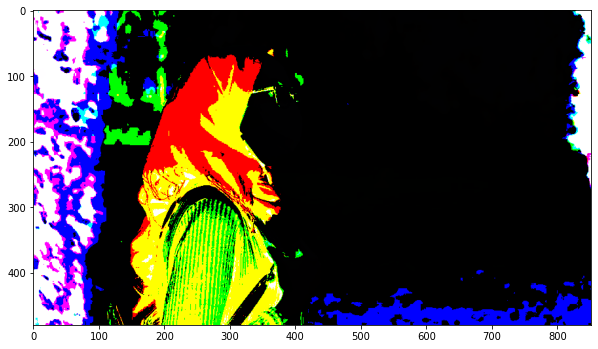

In [ ]:
f = plt.figure(figsize=(10,10))
datagen = ImageDataGenerator(featurewise_center =True,        
      featurewise_std_normalization = True)

datagen.fit(samples)
it=datagen.flow(samples, batch_size=1)
batch = it.next()
result = batch[0].astype('uint8')
plt.imshow(result)
plt.show()

In [ ]:
batch[0]

array([[[-1.8512089 , -2.0166204 , -1.704214  ],
        [-1.5335885 , -1.6837949 , -1.4017285 ],
        [-1.5335885 , -1.6837949 , -1.435338  ],
        ...,
        [-1.3906593 , -1.334328  , -1.3849237 ],
        [-1.3747783 , -1.3176868 , -1.368119  ],
        [-1.3588972 , -1.3010455 , -1.3513142 ]],

       [[-1.8512089 , -2.0166204 , -1.704214  ],
        [-1.5177075 , -1.6671536 , -1.3849237 ],
        [-1.5335885 , -1.6671536 , -1.4521427 ],
        ...,
        [-1.3588972 , -1.3010455 , -1.3513142 ],
        [-1.3588972 , -1.3010455 , -1.3513142 ],
        [-1.3430163 , -1.2844042 , -1.3345095 ]],

       [[-1.8194469 , -1.9833379 , -1.704214  ],
        [-1.5018265 , -1.6505123 , -1.4017285 ],
        [-1.5177075 , -1.6505123 , -1.435338  ],
        ...,
        [-1.3430163 , -1.2677629 , -1.3177048 ],
        [-1.3271352 , -1.2511216 , -1.3009    ],
        [-1.3271352 , -1.2511216 , -1.3009    ]],

       ...,

       [[-1.4541833 , -1.6338711 , -1.704214  ],
        [-1

#### **What are the benefits of data augmentation?**

<br>  
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/e2e/ee/dp6.png"width="670" height="350"/></center>

<br>  